In [ ]:
import pandas as pd
import numpy as np
data=({
    'Area' : [2000,2500,2700,2900,3100,3200],
    'Price': [350000, 424000, 433000,483000, 497564, 521356]
})
df = pd.DataFrame(data)
df

,Area,Price
0,2000,350000
1,2500,424000
2,2700,433000
3,2900,483000
4,3100,497564
5,3200,521356


In [ ]:
x = df[['Area']]
y = df['Price']

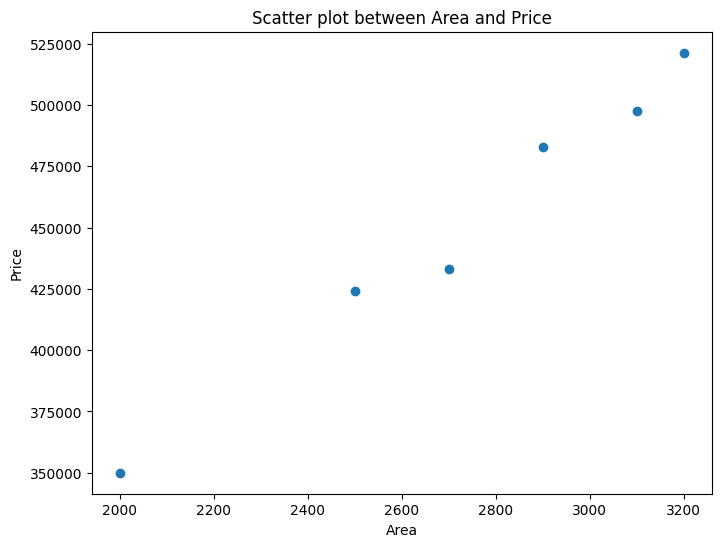

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Scatter plot between Area and Price")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
slope = model.coef_
intercept= model.intercept_
print(slope)
print(intercept)

[139.93794521]
68989.61643835623


In [ ]:
print(f'y={slope[0]} + {intercept}*x')

y=139.93794520547942 + 68989.61643835623*x


In [ ]:
new_x = 3500
y = intercept + slope * new_x
print(f"Price of Area 3500 sq.km.= {y[0]}")

Price of Area 3500 sq.km.= 558772.4246575342


In [ ]:
y_pred = model.predict(x)
print(y_pred)

[348865.50684932 418834.47945205 446822.06849315 474809.65753425
 502797.24657534 516791.04109589]


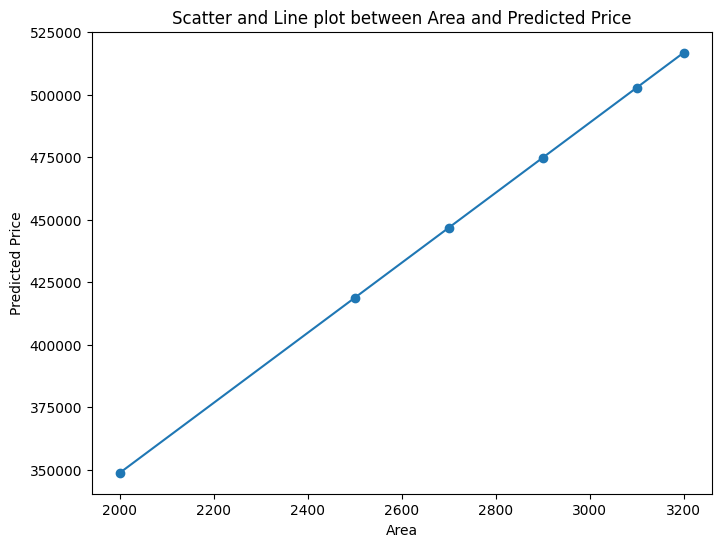

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x,y_pred)
plt.plot(x, y_pred)
plt.xlabel("Area")
plt.ylabel("Predicted Price")
plt.title("Scatter and Line plot between Area and Predicted Price")
plt.show()

In [ ]:
n = 6
y_actual = df['Price'].values
MSE = (1/n) * np.sum((y_actual-y_pred)**2)
print(MSE)

55721113.981735244


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_actual, y_pred)
print(MSE)
R2 = r2_score(y_actual, y_pred)
print(R2)

55721113.98173525
0.9827620024254192


In [ ]:
learning_rate = 0.000000000001
slope = 0
intercept = 0
x = df['Area'].values
for i in range(1,100):
  y_pred = slope * x + intercept
  error = (y_actual - y_pred)
  slope_grad = (-2/n) * (np.sum(error * x))
  intercept_grad = (-2/n) * np.sum(error)
  MSE = mean_squared_error(y_actual, y_pred )
  print(MSE)
  slope = slope - learning_rate * slope_grad
  intercept = intercept - learning_rate * intercept_grad
print(f"slope = {slope}")
print(f"Intercept = {intercept}")

207072668805.33334
207066351023.70483
207060033434.97778
207053716039.14636
207047398836.20462
207041081826.14673
207034765008.96677
207028448384.6588
207022131953.21704
207015815714.6355
207009499668.90833
207003183816.02966
206996868155.99353
206990552688.79416
206984237414.42563
206977922332.88196
206971607444.15738
206965292748.24597
206958978245.14175
206952663934.839
206946349817.3317
206940035892.614
206933722160.68005
206927408621.52393
206921095275.13977
206914782121.52164
206908469160.6637
206902156392.56003
206895843817.2048
206889531434.59207
206883219244.71594
206876907247.57065
206870595443.15015
206864283831.4487
206857972412.4603
206851661186.1791
206845350152.59927
206839039311.71484
206832728663.52002
206826418208.00888
206820107945.1755
206813797875.01404
206807487997.51865
206801178312.68335
206794868820.50235
206788559520.96973
206782250414.0796
206775941499.82605
206769632778.20328
206763324249.20535
206757015912.82642
206750707769.06055
206744399817.90195
2067380

In [1]:
#Multiple Linear Regression
data1={
    'Years_of_experience':[5,7,8,11],
    'Education':['Bachelor','Bachelor','Master','Master'],
    'Salary':[35000,45000,55000,85000]
}
df=pd.DataFrame(data1)
print(df)

   Years_of_experience Education  Salary
0                    5  Bachelor   35000
1                    7  Bachelor   45000
2                    8    Master   55000
3                   11    Master   85000


In [3]:
df_encoded=pd.get_dummies(df, columns=['Education'], drop_first=True)
print(df_encoded)

   Years_of_experience  Salary  Education_Master
0                    5   35000             False
1                    7   45000             False
2                    8   55000              True
3                   11   85000              True


In [4]:
x=df_encoded[['Years_of_experience','Education_Master']]
y=df_encoded['Salary']

In [5]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)


LinearRegression()

In [6]:
intercept = model.intercept_
coef = model.coef_
print("Intercept (β0):", intercept)
print("Coefficients (β1, β2):", coef)

Intercept (β0): -10769.23076923078
Coefficients (β1, β2): [8461.53846154  384.61538462]


In [7]:
#y=β0 + β1 * x1 + β2 * x2
Years_of_experience=10
Education_Master=1
salary=-10768.23 + 8461.53 * Years_of_experience + 384.61 * Education_Master
print(salary)

74231.68000000001
